## Observations about accuracy and loss with different optimizers

### SGD

    Test loss: 0.15406174105852843
    
    Test accuracy: 0.9535999894142151


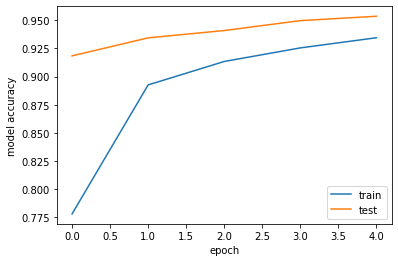


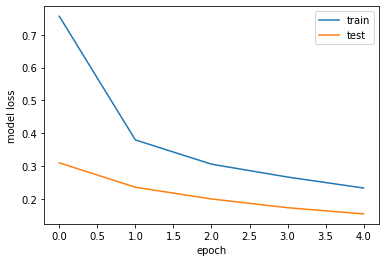

- We can observe that loss and accuracy for the train data set tend to converge very slowly to those of the test data set. This seems to suggest that it will be neccesary a bigger number of epochs impling that SGD is not very efficient as optimizer for this problem.

### Adagrad

    Test loss: 0.0735606251609046
    
    Test accuracy: 0.9767000079154968

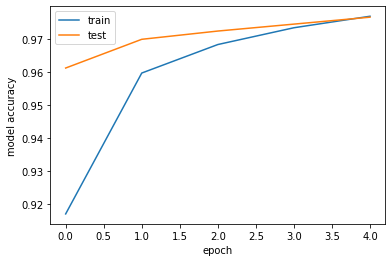

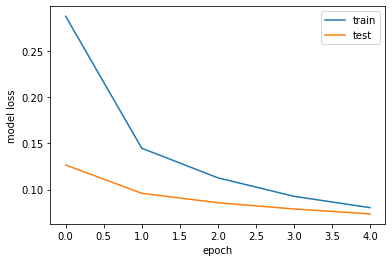

- We can observe that loss and accuracy for the train data set tend to converge in 5 epochs to those of the test data set. This seems to suggest that Adagrad is a good optimizer for this problem.

### Adadelta

    Test loss: 0.07055832334354054
    
    Test accuracy: 0.982200026512146

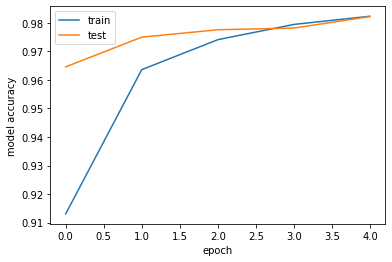

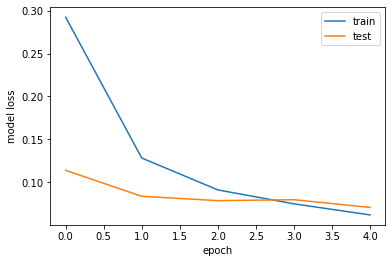

- We can observe that loss and accuracy for the train data set tend to converge in less than 4 epochs to those of the test data set. This seems to suggest that with Adadelta we could reduce the epochs to 3 but this will give a worse result than that with Adagarad. On the other hand with 4 epochs the simulation will produce results with the test data set with a worse error function and worse accuracy than that with train data set.

# Convolutional Neural Network (CNN) image recognition with MNIST data set

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

- Load and Process the data

In [3]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [4]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255


Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


- Define the Neural Net and its Architecture

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(20, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(320))
    model.add(Dense(320))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


- Choose the Optimizer and the Cost Function

In [7]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_CNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained!')

Model compiled successfully and ready to be trained!


- Train the model

In [8]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=compile_model()


# train CNN
h = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 182s 3ms/step - loss: 0.1403 - accuracy: 0.9557 - val_loss: 0.0551 - val_accuracy: 0.9833
Epoch 2/5
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0623 - accuracy: 0.9809 - val_loss: 0.0455 - val_accuracy: 0.9846
Epoch 3/5
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.0419 - val_accuracy: 0.9858
Epoch 4/5
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0445 - accuracy: 0.9868 - val_loss: 0.0420 - val_accuracy: 0.9874
Epoch 5/5
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0402 - accuracy: 0.9875 - val_loss: 0.0406 - val_accuracy: 0.9870


- Evaluate the Model Performance on the *Unseen* Test Data

10000/10000 [==============================] - 9s 933us/step

Test loss: 0.04057923849457875
Test accuracy: 0.9869999885559082


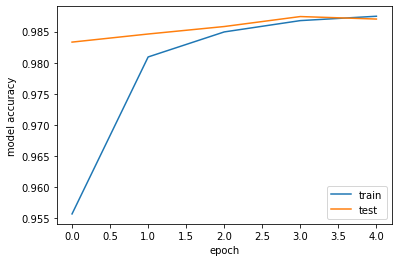

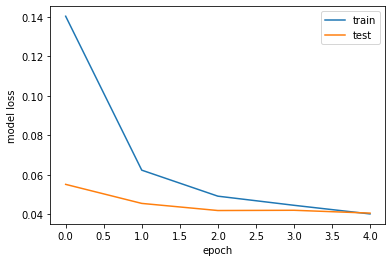

In [9]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

(10000, 28, 28, 1)


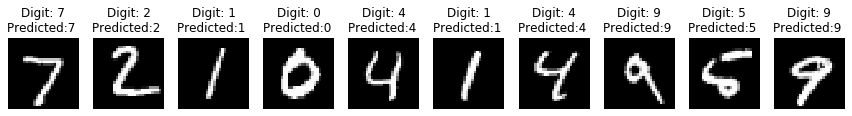

In [10]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)
print(X_test.shape)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:{} ".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

# CNN image recognition with my handwritten digits

Image size: 28x28


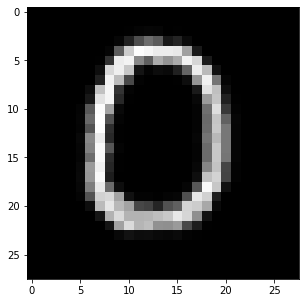

Image size: 28x28


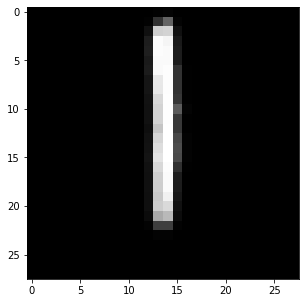

Image size: 28x28


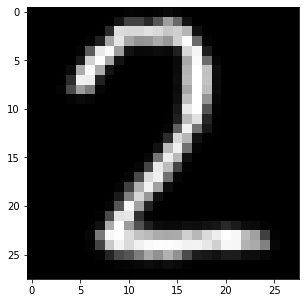

Image size: 28x28


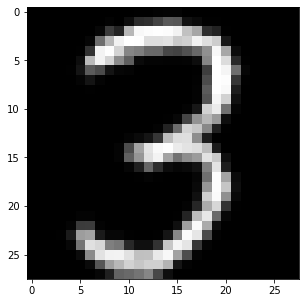

Image size: 28x28


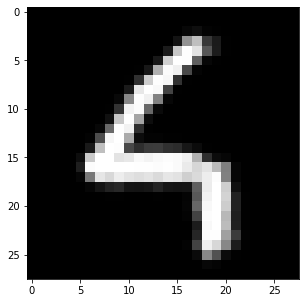

Image size: 28x28


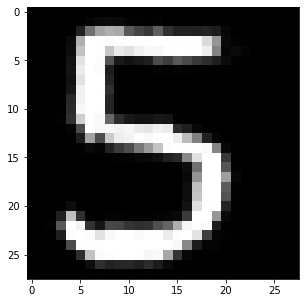

Image size: 28x28


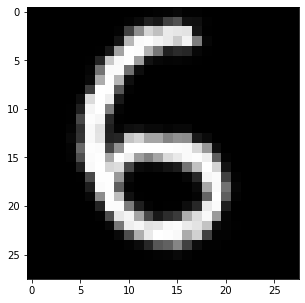

Image size: 28x28


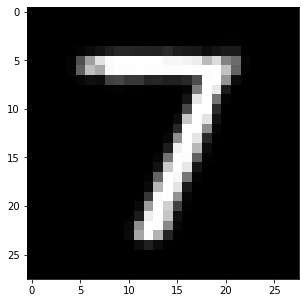

Image size: 28x28


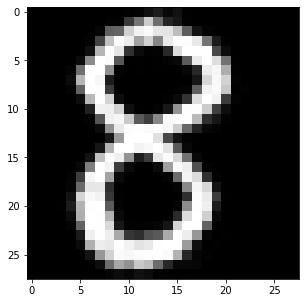

Image size: 28x28


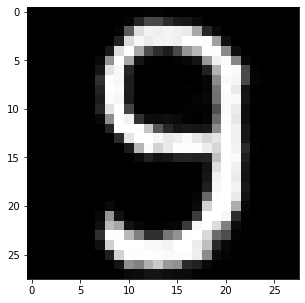

(10, 28, 28)


In [44]:
from PIL import Image
import os
data = np.zeros((num_classes, img_cols, img_rows))
for k in range(num_classes):
    digit_filename = "my_handwritten"+str(k)+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();

    for j in range(ydim):
        for i in range(xdim):
            data[k,i,j]=pix[j,i]

    data[k] /= 255

    plt.figure(figsize=(5,5))
    plt.imshow(data[k], cmap='gray')
    plt.show()

print(data.shape)



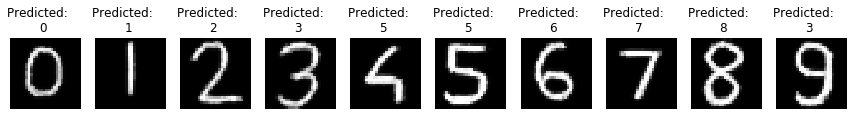

In [45]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    
else:
    data = data.reshape(data.shape[0], img_rows, img_cols, 1)


predictions = model_CNN.predict(data)

data = data.reshape(data.shape[0], img_rows, img_cols,1)


plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(data[i, :, :, 0], cmap='gray')    
    plt.title("Predicted:    \n{} ".format(np.argmax(predictions[i])))  
    plt.axis('off') 


We can observe that 7 digits in 9 are well predicted.